# California Housing Price

### **Contents**

1. Business Problem 
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### **Business Problem**


#### **Latar Belakang**

Sebuah perusahaan agen perumahan di California menawarkan layanan penjualan dan pembelian rumah. Perusahaan bertindak sebagai pihak ketiga yang akan menghubungkan antara pihak penjual dengan pembeli. Salah satu hal yang sangat perlu diperhatikan adalah dalam hal penentuan harga rumah. Penentuan harga rumah akan berdampak terhadap jual beli. Jika harganya terlalu tinggi dibanding properti-properti lain dengan fitur sejenis di sekitar areanya, tentu akan terjadi penurunan pembelian. Sebaliknya, jika terlalu rendah, tentu penjual tidak akan mendapatkan profit yang sepadan. Banyak faktor yang dapat mempengaruhi harga rumah seperti lokasi, usia rumah, jumlah ruangan, jumlah kamar, populasi di sekitar lingkungan rumah, dan lain sebagainya yang perlu diperhatikan dalam menentukan harga rumah. 

#### **Problem Satement**

Dalam menentukan harga rumah tidak cukup hanya dengan membandingkan harga dengan rumah-rumah yang ada di sekitarnya atau hanya dengan mengikuti harga pasar. Salah satu tantangan besar untuk sebuah perusahaan agen perumahan adalah memiliki bisnis yang dapat menguntungkan secara finansial bagi penjual rumah dan memberikan kepuasan bagi pembelinya. Semakin banyaknya orang yang ingin menjual rumah, maka sangat penting untuk dapat menentukan harga rumah secara tepat agar kompetitif dengan harga jual rumah lainnya.  

#### **Tujuan**

Berdasarkan permasalahan di atas, perusahaan agen perumahan memerlukan sebuah *"tool"* yang dapat membantu dalam memprediksi harga rumah dengan tepat. *Tool* ini dapat digunakan ketika seseorang ingin menjual rumahnya melalui agen perumahan sebagai perantara, kemudian menggunakan *tool* tersebut untuk melakukan prediksi harga rumahnya berdasarkan faktor-faktor tertentu seperti lokasi rumah, usia rumah, jumlah ruangan, jumlah kamar, populasi di sekitar lingkungan rumah, dan keadaan lingkungan rumah. 

#### **Analytic Approach**

Jadi, yang perlu dilakukan dalam hal ini adalah 
* menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan satu rumah dengan yang lainnya. 
* membangun suatu model regresi yang akan membantu perusahaan agen perumahan untuk dapat menyediakan 'tool' prediksi harga rumah yang akan berguna untuk penjual dalam menentukan harga jual rumahnya.

#### **Metric Evaluation** (Harus edit lagi!!!!!)

Evaluasi metrik yang akan digunakan adalah MAE, dan MAPE, di mana MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai MAE dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan. 

### **Data Understanding**

- Dataset berisikan data listing rumah-rumah yang ada di California berdasarkan sensus data tahun 1990.
- Setiap baris data merepresentasikan informasi terkait rumah-rumah di California.

**Attributes Information**

| **Nama Kolom** | **Tipe Data** | **Deskripsi** |
| --- | --- | --- |
| longtitude | Float | Longitude coordinates |
| latitude | Float | Latitude coordinates |
| housing_median_age | Float | Housing median age |
| total_rooms | Float | total rooms in the house |
| total_bedrooms | Float | Total bedrooms in the house |
| population | Float | Population |
| households | Float | Longitude coordinates |
| median_income | Object | Listing space type |
| ocean_proximity | Integer | Price in dollars |
| median_house_value | Float | Harga rata-rata rumah |

<br>

In [331]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [332]:
# Dataset
df = pd.read_csv('data_california_house.csv')

In [333]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


### Exploratory Data analysis

In [334]:
# Jumlah perumahan beradasrkan kedekatan lokasinya dengan laut
print(f"Jumlah perumahan berdasarkan kedekatan lokasinya dengan laut:\n{df['ocean_proximity'].value_counts()}")

Jumlah perumahan berdasarkan kedekatan lokasinya dengan laut:
<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
ISLAND           2
Name: ocean_proximity, dtype: int64


Text(0.5, 1.0, 'Lokasi Perumahan Berdasarkan Jarak Kedekatan Dengan Laut')

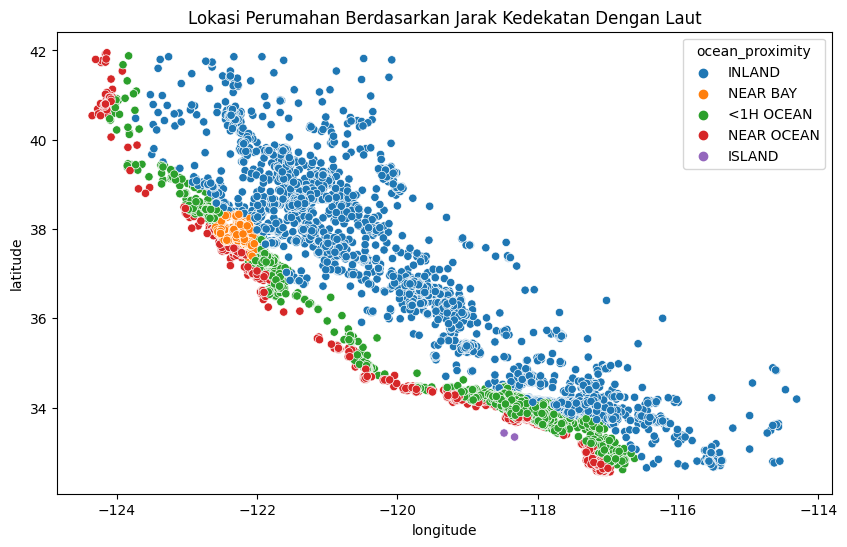

In [335]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = df['longitude'], y = df['latitude'], hue=df['ocean_proximity']).set_title('Lokasi Perumahan Berdasarkan Jarak Kedekatan Dengan Laut')

Perumahan paling banyak terletak di lokasi yang memiliki waktu kurang dari 1 jam (<1H OCEAN) untuk menuju ke laut, kemudian diikuti oleh lokasi yang jauh dari lautan (INLAND). 

Text(0.5, 1.0, 'Harga perumahan berdasarkan lokasi')

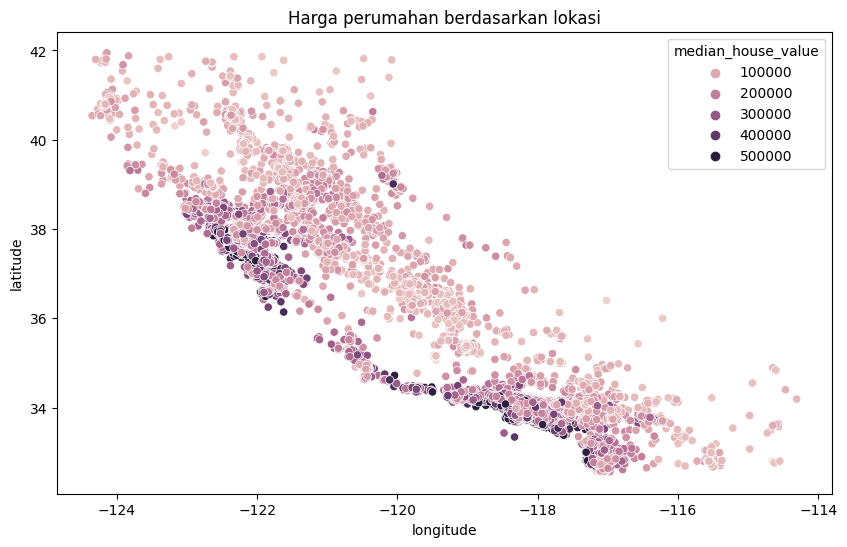

In [336]:
# Harga perumahan berdasarkan kedekatan lokasi dengan laut
plt.figure(figsize=(10, 6))
sns.scatterplot(x = df['longitude'], y = df['latitude'], hue=df['median_house_value']).set_title('Harga perumahan berdasarkan lokasi')

Perumahan yang memiliki harga cukup tinggi banyak terletak di lokasi dekat lautan dan harga perumahan yang lokasinya jauh dari laut cenderung lebih rendah harganya. 

### Data Preprocessing

Dalam tahapan ini, akan dilakukan *Data Cleaning* pada dataset yang nantinya data yang sudah dibersihkan akan digunakan untuk tahap analisis selanjutnya. Beberapa hal yang perlu dilakukan yaitu:
- Melakukan *Drop* pada fitur yang tidak relevan terhadap permasalahan yang akan diselesaikan.
- Melakukan treatment terhadap missing value jika ada dengan metode yang paling baik berdasarkan permasalahannya.

Data yang akan digunakan dalam data preprocessing adalah hasil duplikasi dari dataframe yang sebelumnya digunakan.

In [337]:
df_house = df.copy()

In [338]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [339]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_house.columns:
    listItem.append([col, df_house[col].dtype, df_house[col].isna().sum(), round((df_house[col].isna().sum()/len(df_house[col]))*100, 2),
                    df_house[col].nunique(), list(df_house[col].drop_duplicates().sample(2).values)]);

df_house_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_house_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,longitude,float64,0,0.00,806,"[-118.95, -117.1]"
1,latitude,float64,0,0.00,836,"[40.59, 34.52]"
2,housing_median_age,float64,0,0.00,52,"[23.0, 12.0]"
3,total_rooms,float64,0,0.00,5227,"[5534.0, 4786.0]"
4,total_bedrooms,float64,137,0.95,1748,"[1703.0, 351.0]"
5,population,float64,0,0.00,3498,"[1978.0, 1771.0]"
6,households,float64,0,0.00,1649,"[570.0, 214.0]"
7,median_income,float64,0,0.00,9797,"[6.0891, 1.875]"
8,ocean_proximity,object,0,0.00,5,"[INLAND, NEAR OCEAN]"
9,median_house_value,float64,0,0.00,3548,"[296300.0, 199200.0]"


Berdasarkan informasi di atas, terdapat 10 kolom dan 14448 baris data. Fitur yang memiliki missing value hanya fitur total_bedrooms. Berdasarkan domain knowledge, semua fitur yang ada pada dataset relevan dengan tujuan analisis untuk menyelesaikan permasalahan yang dihadapi. Oleh karena itu tidak akan ada fitur yang dihapus dari data frame.


In [340]:
# Cek data duplikat
df_house.duplicated().sum()

0

Hasil cek duplikat di atas menunjukkan bahwa tidak ada data duplikat dalam dataset yang akan digunakan dalam analisis.

### Missing Value

In [341]:
# Cek persentase missing value
(df_house.isna().sum()/df_house.shape[0])*100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.948228
population            0.000000
households            0.000000
median_income         0.000000
ocean_proximity       0.000000
median_house_value    0.000000
dtype: float64

<Axes: >

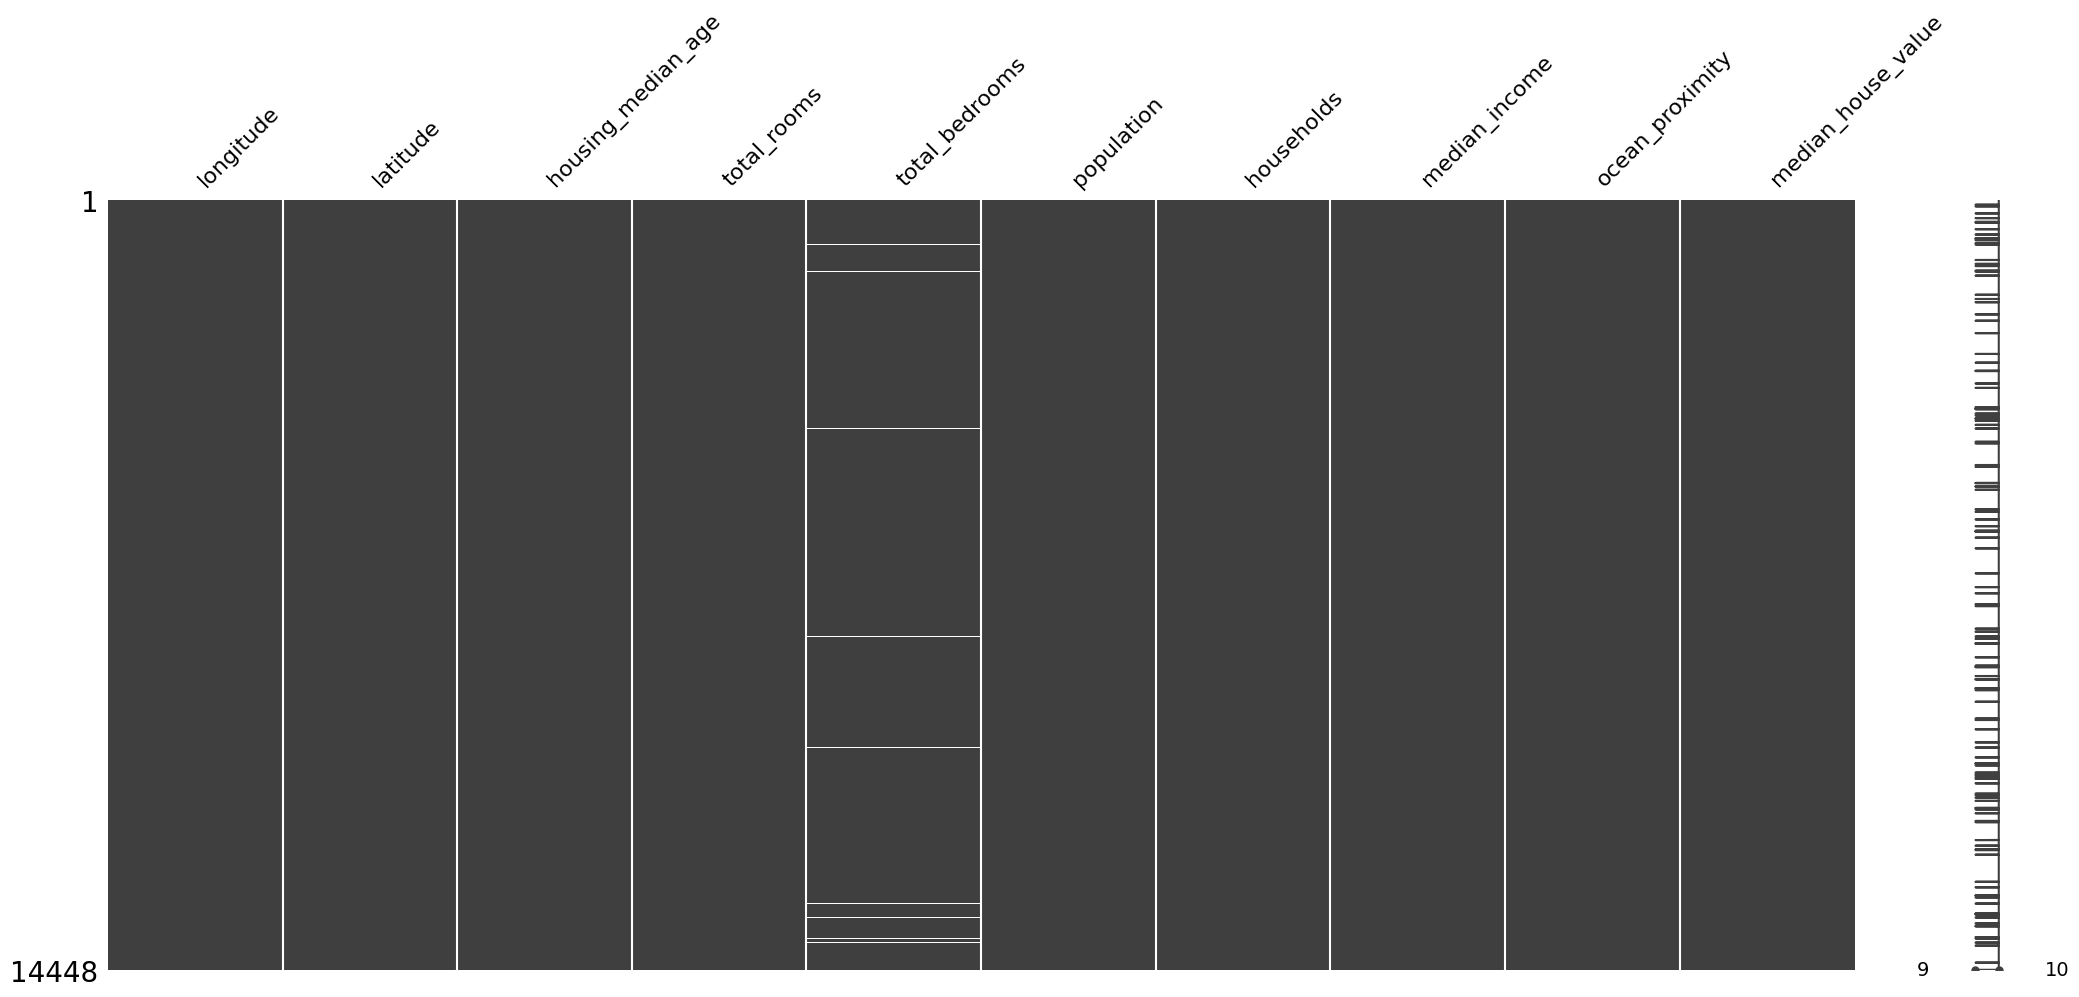

In [342]:
# Sebaran missing value dalam data

import missingno
missingno.matrix(df_house)

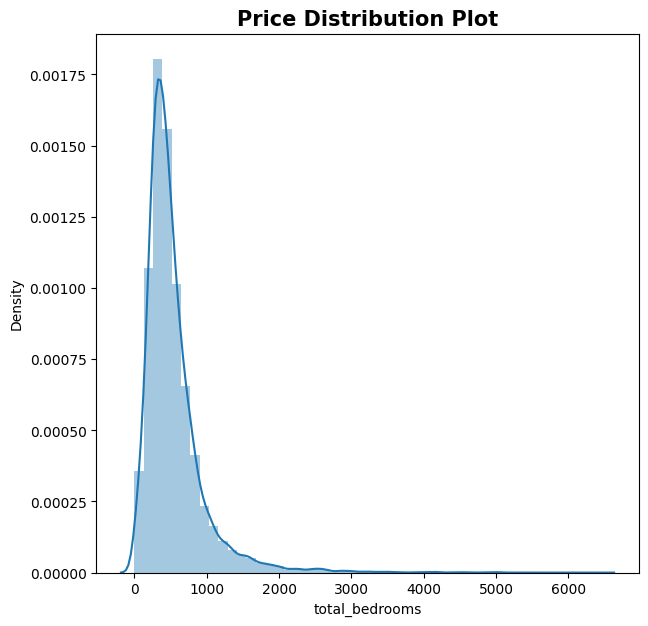

In [343]:
# Plot distribusi fitur 'price'
plt.figure(figsize=(7, 7))
sns.distplot(df_house['total_bedrooms'])
plt.title('Price Distribution Plot', size=15, weight='bold');

In [344]:
df_house['total_bedrooms'].median()

435.0

In [345]:
df_house['total_bedrooms'].mean()

538.2607085458739

Dengan melihat plot distribusi dari fitur total_bedrooms yang tidak normal, maka untuk menangani missing value tersebut tidak bisa dilakukan dengan mengisinya menggunakan mean ataupun median. Oleh karena itu missing value tersebut akan dihapus karena tidak ada cara lain yang lebih baik untuk dilakukan dalam menangani missing value. Selain itu persentase missing value yang sangat kecil yaitu sekitar 0.95% tidak akan mempengaruhi analisis nantinya setelah dilakukan penghapusan. 

In [346]:
# Menghapus missing value
df_house.dropna(inplace=True)

In [347]:
# Pengecekan kembali missing value
df_house.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [348]:
#Jumlah baris data
df_house.shape[0]

14311

Setelah dilakukan penghapusan dan pengecekan kembali, sudah tidak ada lagi missing value di dalam dataset yang akan digunakan dalam tahapan selanjutnya. Dataset sekarang memiliki 10 kolom dan 14311 baris data.

In [349]:
# Cek deskriptif statistik fitur numerikal
num_features = [feature for feature in df_house.columns if ((df_house[feature].dtypes != 'object'))] 
df_house[num_features].describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000
mean,-119.567150,35.631365,28.609671,2640.917686,538.260709,1424.772273,499.480470,3.866774,206793.156942
std,2.006374,2.139589,12.606493,2197.192896,423.577544,1151.795857,383.826005,1.890866,115404.371629
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1452.000000,295.000000,784.000000,279.000000,2.569400,119400.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1164.000000,410.000000,3.540300,180000.000000
75%,-118.000000,37.715000,37.000000,3142.000000,647.000000,1722.000000,603.500000,4.736100,263750.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Semua nilai pada fitur bernilai positif (pengecualian untuk fitur longitude) dan tidak ada nilai yang dirasa tidak masuk akal.

### Data Correlation

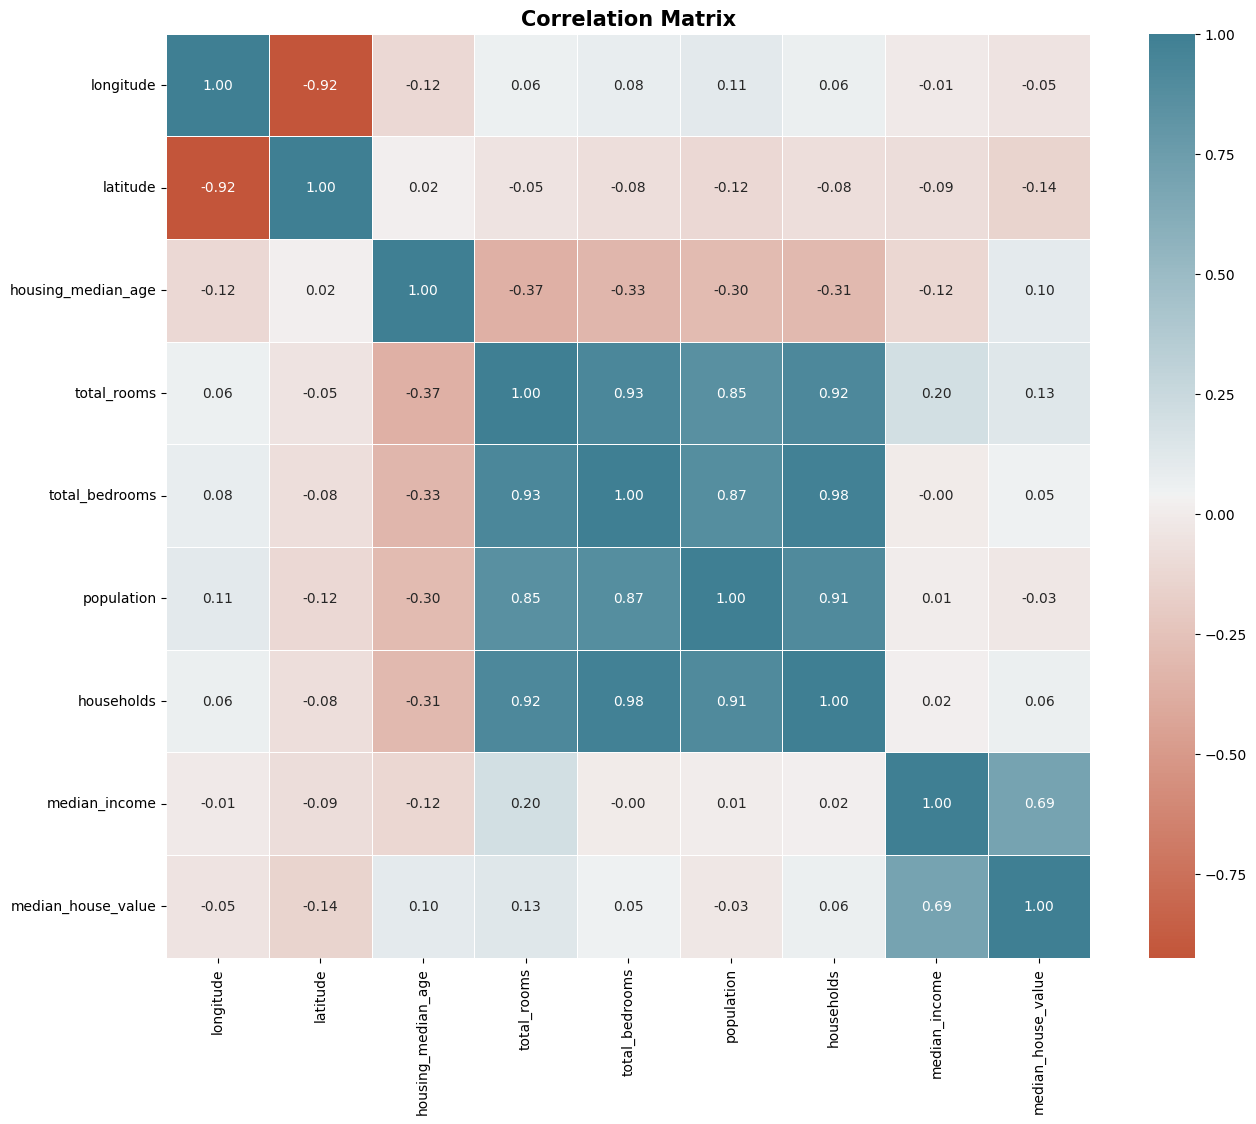

In [350]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df_house.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

Correlation matrix menunjukkan bahwa median_income memiliki korelasi posisitif yang cukup kuat terhadap median_house_value, artinya semakin besar nilai median_income maka semakin besar pula nilai median_house_valuenya. Sedangkan untuk fitur-fitur yang lain tidak memiliki korelasi yang cukup kuat dengan median_house_value.

### Outliers Detection

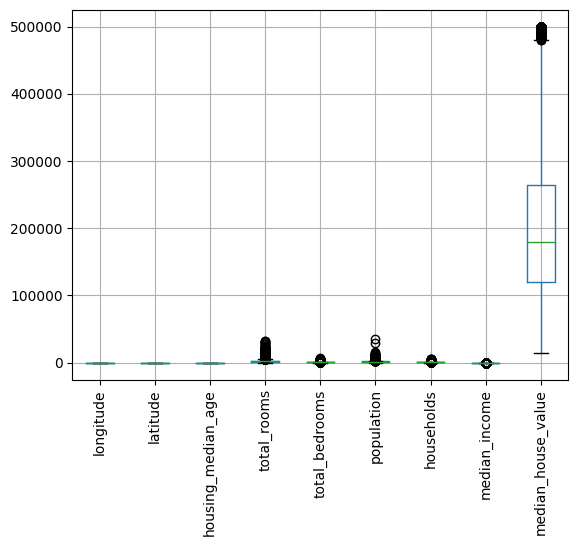

In [351]:
# Plot boxplot untuk mengecek outliers
df_house.boxplot(rot=90);

Dari boxplot di atas, terlihat bahwa ada outliers pada beberapa fitur yaitu total_rooms, total_bedrooms, population, households, median_income, dan median_house_value. 

In [352]:
# Membuat fungsi untuk mengecek outliers
def check_outlieurs(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')   

In [353]:
# Outliers pada fitur total_rooms
check_outlieurs(df_house['total_rooms'])

IQR: 1690.0
limit_bawah: -1083.0
limit_atas: 5677.0


In [354]:
# Outliers pada fitur total_bedrooms
check_outlieurs(df_house['total_bedrooms'])

IQR: 352.0
limit_bawah: -233.0
limit_atas: 1175.0


In [355]:
# Outliers pada fitur population
check_outlieurs(df_house['population'])

IQR: 938.0
limit_bawah: -623.0
limit_atas: 3129.0


In [356]:
# Outliers pada fitur households
check_outlieurs(df_house['households'])

IQR: 324.5
limit_bawah: -207.75
limit_atas: 1090.25


In [357]:
# Outliers pada fitur median_income
check_outlieurs(df_house['median_income'])

IQR: 2.1667000000000005
limit_bawah: -0.6806500000000009
limit_atas: 7.986150000000001


In [358]:
# Outliers pada fitur median_house_value
check_outlieurs(df_house['median_house_value'])

IQR: 144350.0
limit_bawah: -97125.0
limit_atas: 480275.0


Selanjutnya akan dilakukan feature engineering terhadap fitur numerikal

#### total_rooms

In [359]:
# Cek deskriptif statistik kolom total_rooms
df_house['total_rooms'].describe()

count    14311.000000
mean      2640.917686
std       2197.192896
min          2.000000
25%       1452.000000
50%       2125.000000
75%       3142.000000
max      32627.000000
Name: total_rooms, dtype: float64

In [360]:
# Cek total_rooms > 5677.0
df_house[df_house['total_rooms'] > 5677.0].count()['total_rooms']

905

Berdasarkan deskriptif statistik di atas, terlihat bahwa 75% data pada kolom total_rooms nilainya dibawah 3142, sedangkan nilai maksimalnya 32627 sehingga terdapat skewness pada distribusinya. Kemudian berdasarkan batas atas IQR (5677), terdapat 905 data dari fitur total_rooms yang termasuk ke dalam outlier. Oleh karena itu dfitur total_rooms yang nilainya lebih dari 5677 tidak akan dimasukkan ke dalam pemodelan agar tidak menghasilkan bias nantinya.

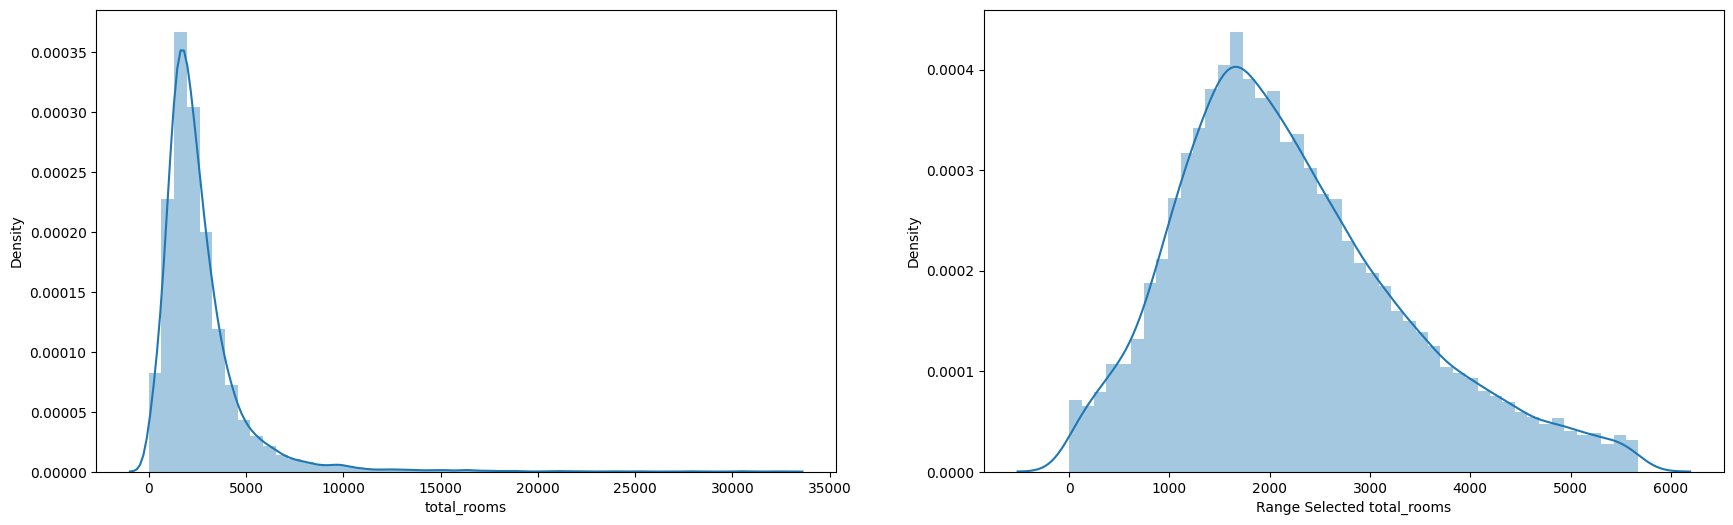

In [361]:
# Melakukan filtering pada data
df_house = df_house[(df_house['total_rooms'] <= 5677)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['total_rooms'], ax=axes[0])
sns.distplot(df_house['total_rooms'], ax=axes[1])
axes[0].set_xlabel('total_rooms')
axes[1].set_xlabel('Range Selected total_rooms');

#### total_bedrooms

In [362]:
# Cek deskriptif statistik kolom total_bedrooms
df_house['total_bedrooms'].describe()

count    13406.000000
mean       462.087498
std        252.641039
min          1.000000
25%        287.000000
50%        416.000000
75%        595.000000
max       2610.000000
Name: total_bedrooms, dtype: float64

In [363]:
# Cek total_bedrooms > 1175.0
df_house[df_house['total_bedrooms'] > 1175.0].count()['total_bedrooms']

198

Berdasarkan batas atas IQR (1175), terdapat 198 data dari kolom total_bedrooms yang termasuk outlier. Data otlier tersebut tidak akan dimasukkan ke dalam pemodelan agar tidak menimbulkan bias. Selain itu jumlah outliernya sedikit sehingga tidak akan menghilangkan banyak informasi aktual.

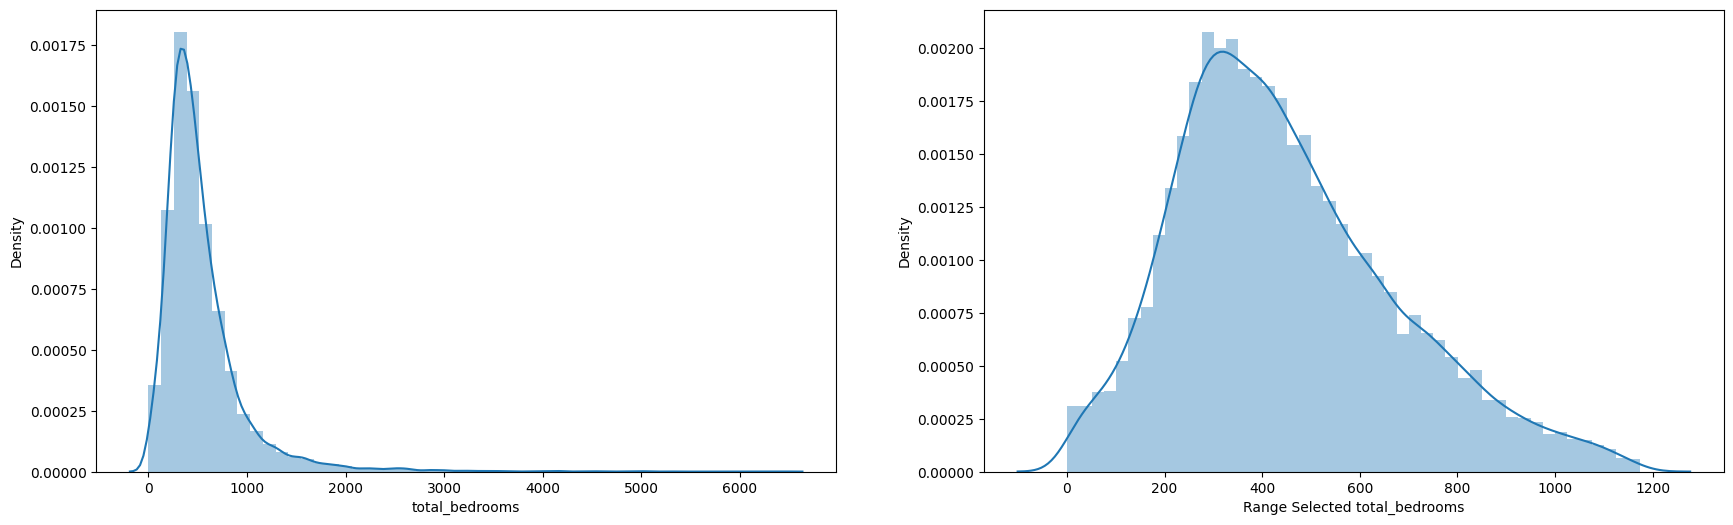

In [364]:
# Melakukan filtering pada data
df_house = df_house[(df_house['total_bedrooms'] <= 1175.0)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['total_bedrooms'], ax=axes[0])
sns.distplot(df_house['total_bedrooms'], ax=axes[1])
axes[0].set_xlabel('total_bedrooms')
axes[1].set_xlabel('Range Selected total_bedrooms');

#### population

In [365]:
# Cek deskriptif statistik kolom population
df_house['population'].describe()

count    13208.000000
mean      1213.335630
std        668.178462
min          3.000000
25%        760.000000
50%       1102.000000
75%       1560.000000
max       8733.000000
Name: population, dtype: float64

In [366]:
# Cek population > 3129.0
df_house[df_house['population'] > 3129.0].count()['population']

172

Berdasarkan batas atas IQR (3129), terdapat 172 data dari kolom total_bedrooms yang termasuk outlier. Data otlier tersebut tidak akan dimasukkan ke dalam pemodelan agar tidak menimbulkan bias. Selain itu jumlah outliernya sedikit sehingga tidak akan menghilangkan banyak informasi aktual.

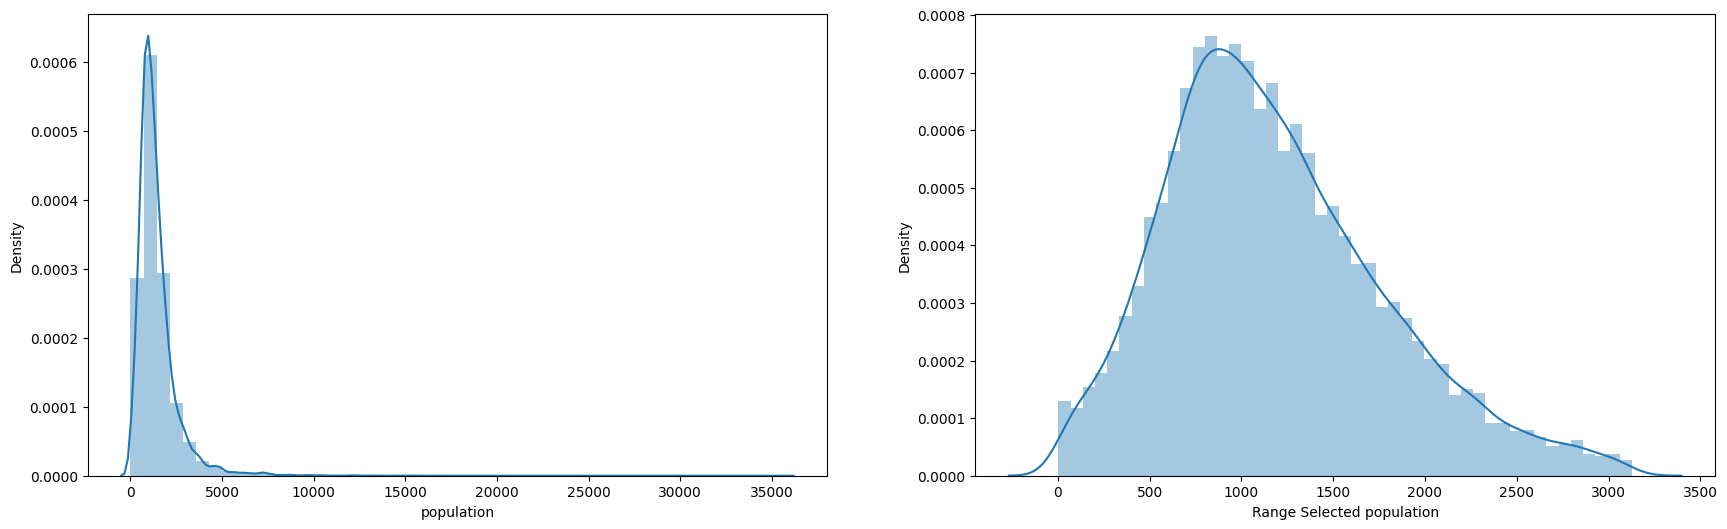

In [367]:
# Melakukan filtering pada data
df_house = df_house[(df_house['population'] <= 3129.0)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['population'], ax=axes[0])
sns.distplot(df_house['population'], ax=axes[1])
axes[0].set_xlabel('population')
axes[1].set_xlabel('Range Selected population');

#### households

In [368]:
# Cek deskriptif statistik kolom households
df_house['households'].describe()

count    13036.000000
mean       414.506674
std        205.525557
min          1.000000
25%        268.000000
50%        386.000000
75%        539.000000
max       1144.000000
Name: households, dtype: float64

In [369]:
# Cek households > 1090.25
df_house[df_house['households'] > 1090.25].count()['households']

5

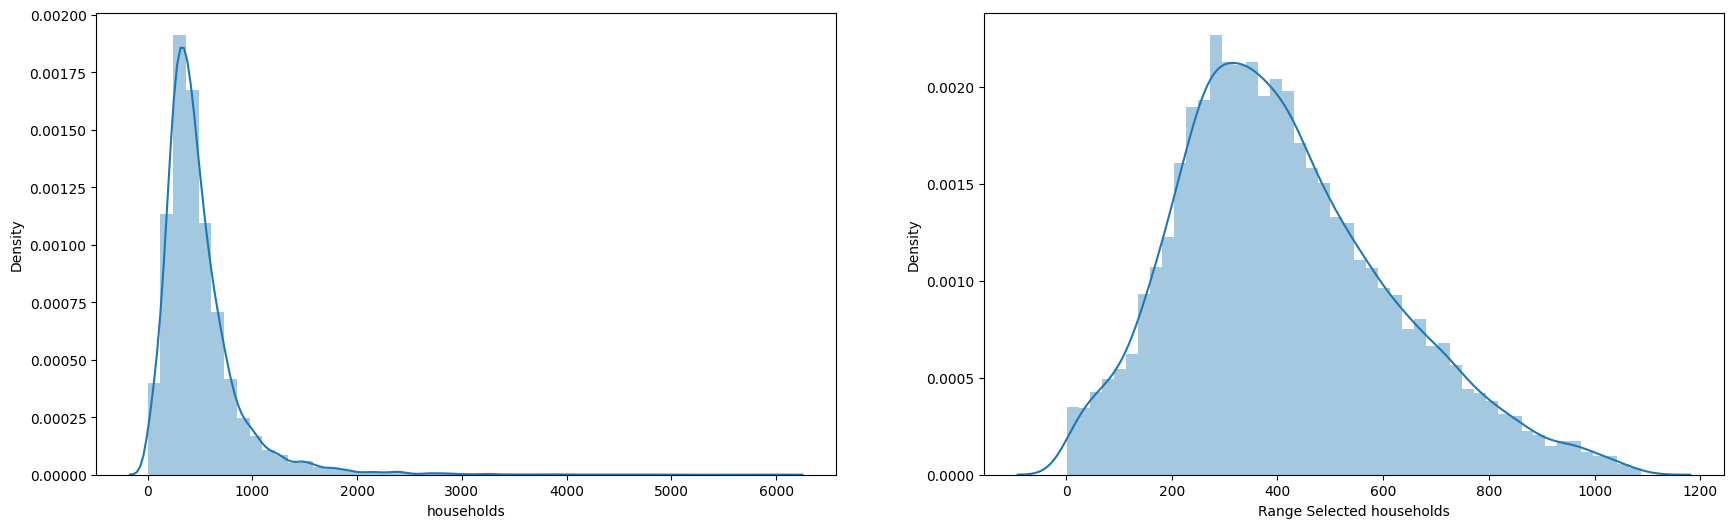

In [370]:
# Melakukan filtering pada data
df_house = df_house[(df_house['households'] <= 1090.25)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['households'], ax=axes[0])
sns.distplot(df_house['households'], ax=axes[1])
axes[0].set_xlabel('households')
axes[1].set_xlabel('Range Selected households');

#### median_income

In [371]:
# Cek deskriptif statistik kolom median_income
df_house['median_income'].describe()

count    13031.000000
mean         3.833978
std          1.886147
min          0.499900
25%          2.547950
50%          3.515600
75%          4.700000
max         15.000100
Name: median_income, dtype: float64

In [372]:
# Cek median_income > 7.986150000000001
df_house[df_house['median_income'] > 7.986150000000001].count()['median_income']

415

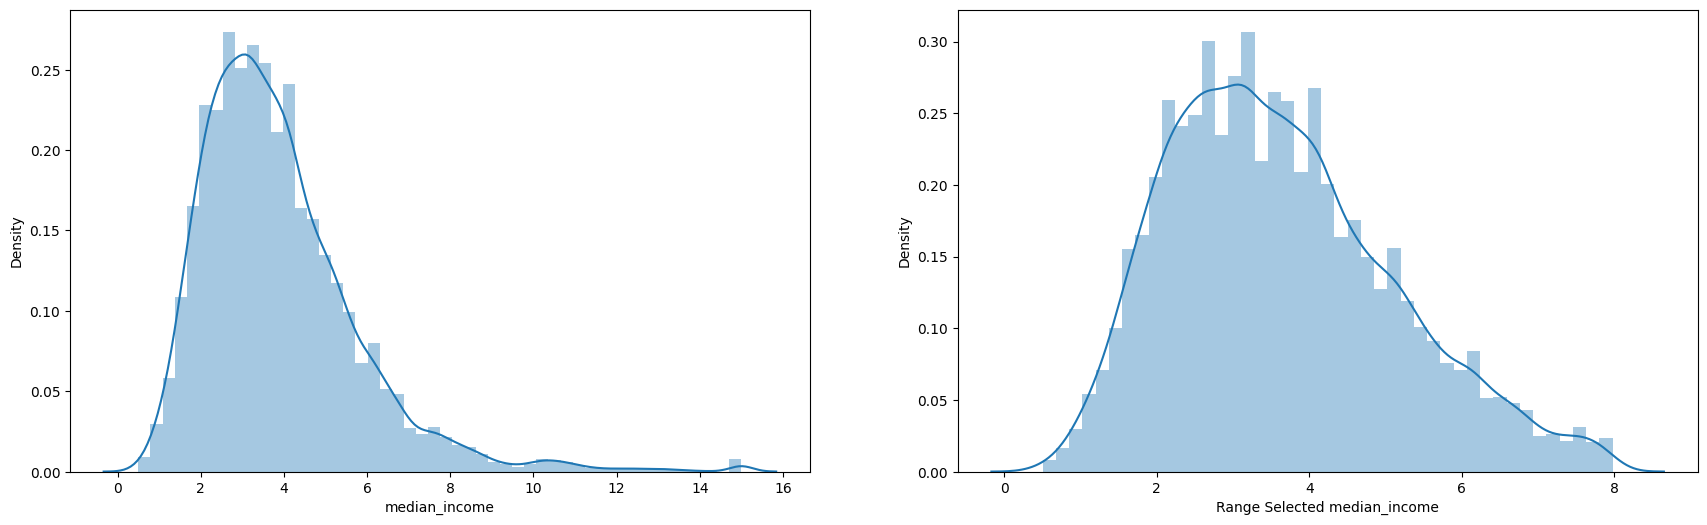

In [373]:
# Melakukan filtering pada data
df_house = df_house[(df_house['median_income'] <= 7.986150000000001)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['median_income'], ax=axes[0])
sns.distplot(df_house['median_income'], ax=axes[1])
axes[0].set_xlabel('median_income')
axes[1].set_xlabel('Range Selected median_income');

#### median_house_value

In [374]:
# Cek deskriptif statistik kolom median_house_value
df_house['median_house_value'].describe()

count     12616.000000
mean     196478.901474
std      106674.724271
min       14999.000000
25%      114800.000000
50%      174200.000000
75%      250700.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [375]:
# Cek median_house_value > 480275.0
df_house[df_house['median_house_value'] > 480275.0].count()['median_house_value']

385

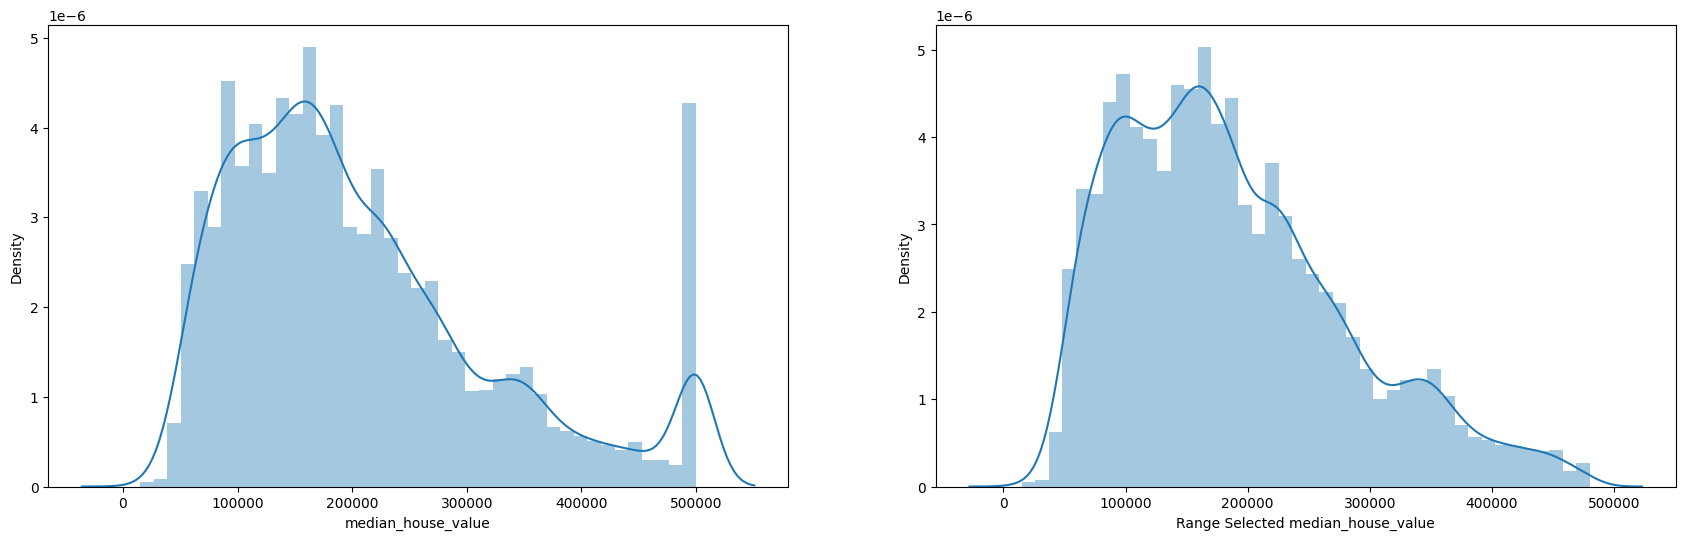

In [376]:
# Melakukan filtering pada data
df_house = df_house[(df_house['median_house_value'] <= 480275.0)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['median_house_value'], ax=axes[0])
sns.distplot(df_house['median_house_value'], ax=axes[1])
axes[0].set_xlabel('median_house_value')
axes[1].set_xlabel('Range Selected median_house_value');

In [377]:
# Cek deskriptif statistik kolom median_house_value setelah filtering
df_house['median_house_value'].describe()

count     12231.000000
mean     186963.199820
std       93647.499731
min       14999.000000
25%      113300.000000
50%      170500.000000
75%      241300.000000
max      480100.000000
Name: median_house_value, dtype: float64

Pada awalnya harga tertinggi rumah (median_house value) adalah 500001 USD. Setelah dilakukan penghapusan pada outlier, nilai tertingginya menjadi 480100 USD. 

### Clean Dataset

In [378]:
df_house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
7,-121.26,38.69,17.0,3917.0,638.0,1809.0,564.0,5.2586,INLAND,137000.0


In [379]:
# Cek info kembali dasaet
df_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12231 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           12231 non-null  float64
 1   latitude            12231 non-null  float64
 2   housing_median_age  12231 non-null  float64
 3   total_rooms         12231 non-null  float64
 4   total_bedrooms      12231 non-null  float64
 5   population          12231 non-null  float64
 6   households          12231 non-null  float64
 7   median_income       12231 non-null  float64
 8   ocean_proximity     12231 non-null  object 
 9   median_house_value  12231 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.0+ MB


Setelah dilakukan feature engineering pada fitur numerik, tersisa 12231 baris data yang akan digunakan dalam pemodelan. Itu artinya hanya sekitar 15% data yang dieliminasi sesuai dengan asumsi dan argumen yang digunakan pada proses sebelumnya

### Modeling

In [405]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

#### Encoding

Sebelum melakukan splitting data, fitur kategorikal yaitu ocean_proximity akan diubah terlebih dahulu menggunakan one hot encoding. Selain itu, untuk fitur numerikal akan dilakukan scaling menggunakan standard scaler untuk normalisasi data agar data yang digunakan tidak memiliki penyimpangan yang sangat besar.

In [381]:
## variabel kategorik untuk dilakukan one hot encoding
one_hot_var = ['ocean_proximity']

## variabel numerik untuk di scalling menggunakan standard scaler
scaling_var = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

## variabel berisikan pipeline untuk encoding
one_hot_encoding = Pipeline([('encoding_onehotencoding',OneHotEncoder(drop='first', handle_unknown='ignore'))])

## variabel berisikan pipeline untuk scaling
scaling = Pipeline(steps=[('scaling',StandardScaler(with_mean=False))])

## Menggabungkan pipeline encoding dan pipeline scaling
transformer = ColumnTransformer([
        ('transformation_categorical', one_hot_encoding, one_hot_var),
        ('transformation_numerical', scaling, scaling_var)],remainder='passthrough')

#### Data Splitting

In [382]:
# Memisahkan data independen variabel dengan target
x = df_house.drop(['median_house_value'], axis=1)
y = df_house['median_house_value']

#### Train and Test Splitting

In [383]:
# Splitting data training dan test dengan proporsi 70:30
x_train, x_test, y_train, y_test= train_test_split(
    x,
    y,  
    test_size=0.3,
    random_state=42)

#### Choose a Benchmark Model

In [384]:
# Define algoritma yang akan digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

In [385]:
# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

In [386]:
## Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]


## Untuk menyimpan nilai MAE
score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

## Untuk menyimpan nilai MAPE
score_mape = []
nilai_mean_mape = []
nilai_std_mape = []


## Mencari algoritma terbaik dalam tahap train
for i in models:
    
    ## metode statistik yang dapat digunakan untuk mengevaluasi kinerja model
    crossval = KFold(n_splits=5, shuffle=True, random_state=42) #n_split 5 kombinasi, #shuffle untuk mengacak -> dibagi 5 berdasarkan n_splits


    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])


    ## MAE
    model_cv_mae = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error',  
        error_score='raise' ### Jika diatur ke 'raise', nilai error dimunculkan 
        )
        ### neg_mean_absolute_error ini scoring parameter untuk nanti dapat di gunakan pada metrik mean_absolute_error
        ### Jika diatur ke 'raise', nilai error dimunculkan 

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())


    ## MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise' 
        )
     ### neg_mean_absolute_percentage_error ini scoring parameter untuk nanti dapat di gunakan pada metrik mean_absolute_percentage_error
     ### Jika diatur ke 'raise', nilai error dimunculkan 

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-41424.52314167 -41843.59812116 -42127.16614723 -43201.94795224
 -39354.20518956] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.23989467 -0.24477863 -0.23888964 -0.24935464 -0.23315905] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-35723.72065931 -36294.78013333 -37372.21570088 -37735.64699526
 -36249.75418665] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-0.1990159  -0.20987303 -0.20508389 -0.20728802 -0.20935553] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-41122.30064215 -46422.83995327 -42571.96320093 -44544.62616822
 -43238.25992991] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                  

In [387]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-41590.288110,1263.122820,-0.241215,0.005495
1,KNN Regressor,-36675.223535,753.845484,-0.206123,0.003936
2,DecisionTree Regressor,-43579.997979,1799.191665,-0.252283,0.012845
3,RandomForest Regressor,-31152.483905,475.158892,-0.176850,0.004749
4,XGBoost Regressor,-29638.743021,385.857973,-0.169443,0.002296


Berdasarkan evaluasi hasil dari lima model yang diuji, dilihat dari nilai MAE dan MAPE yang paling kecil, XGBoost adalah model terbaik. Selanjutnya, akan dilakukan prediksi pada test set dengan benchmark model terbaik, yaitu XGBoost. 

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost

In [392]:
# Benchmark model terbaik
models = {
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

score_mae = []
score_mape = []

## Melakukan prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
        ])

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,MAE,MAPE
Linear Regression,43568.795226,0.280847
KNN,37084.556185,0.220713
Decision Tree Regressor,43938.501635,0.261392
RandomForest,30657.207095,0.187920
XGBoost,29784.541560,0.186089


Setelah dilakukan prediksi pada testing, XGBoost tetap menjadi model terbaik karena memiliki nilai MAE dan MAPE yang paling kecil di antara model-model lainnya sehingga XGBoost akan dipilih sebagai model akhir. Untuk meningkatkan performanya, akan dilakukan *Hyperparameter Tuning* terhadap model XGBoost.

## Hyperparameter Tuning

In [393]:
## Kedalaman pohon
max_depth = list(np.arange(1, 11))

## Learning rate
learning_rate = list(np.arange(1, 100)/100)

## Jumlah pohon
n_estimators = list(np.arange(100, 201))

## Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

## Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11))

## Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

## Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10))


## Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [406]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=42, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning
parameter_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_mean_absolute_percentage_error',
    random_state = 42
)

In [395]:
# Fitting data training untuk mencari parameter terbaik
parameter_xgb.fit(x_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('transformation_categorical',
                                                                               Pipeline(steps=[('encoding_onehotencoding',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore'))]),
                                                                               ['ocean_proximity']),
                                                                              ('transformation_numerical',
                                                                               Pipel...
                                                             0.0027825594022071257,
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=42, refit='neg_mean_absolute_percentage_error',
                   scoring=['neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [407]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
hasil_error = pd.DataFrame(parameter_xgb.cv_results_).sort_values(by=['rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

AttributeError: 'RandomizedSearchCV' object has no attribute 'cv_results_'